# **Example Usage**

This threshold based anomaly detection algorithm works by identifying data points that significantly deviate from the expected pattern of a time series. 

It does this by using a moving average and standard deviation filter to estimate the expected value ranges of the time series at each point in time. **If a data point falls outside a certain number of standard deviations from the moving average, it is considered an anomaly.**

Here's a step-by-step explanation of how the algorithm works:

* Calculate the moving average and standard deviation of the time series over a window of a fixed size (specified by the lag parameter).
* Calculate the upper and lower bounds for the time series values based on the moving average and standard deviation, using a threshold specified by the threshold parameter.
* For each data point in the time series, calculate whether it is outside the upper or lower bounds.
* If a data point is outside the bounds, mark it as an anomaly by assigning it a value of +1 or -1 (depending on whether it is above or below the upper or lower bound, respectively).
* If a data point is not outside the bounds, it is considered normal and assigned a value of 0.
* Optionally, smooth the time series by replacing anomalous values with a weighted average of the previous value and the current value, where the weight is specified by the influence parameter.
* Repeat steps 1-6 for the rest of the time series.


We can express it:

$$\text{is_outlier} = \begin{cases}1 & \text{if } |y_i - \text{Moving Average}_{i-1}| > k \times \text{Standard Deviation}_{i-1}\\-1 & \text{if } |y_i - \text{Moving Average}_{i-1}| < k \times \text{Standard Deviation}_{i-1}\\0 & \text{otherwise}\end{cases}$$

In [183]:
from effective_anomaly_detection import *
import pandas as pd
import numpy as np

# for interactive visual later
import ipywidgets as widgets
from IPython.display import display

## **Generate sample data**

In [184]:
y = generate_syntehtic_timeseries(1_000)
df = pd.DataFrame(y, columns=['Time_Series'])

## **Define Parameters**

In [195]:
LAG = 30
THRESHOLD = 3
ANOMALY_INFLUENCE = 0.5

## **Run Algorithm**

The current implemenation accepts `numpy` arrays and `pandas` series.

In [229]:
# Isolate the feature of interest
y = df["Time_Series"]

# Call the thresholding algorithm
anomDetector = ThresholdingAnomalyDetector(LAG, THRESHOLD, ANOMALY_INFLUENCE)
results = anomDetector.run(y)

## **Plot Results**

You can access the algorithm results directly, but of course plotting the results gives a good indication.

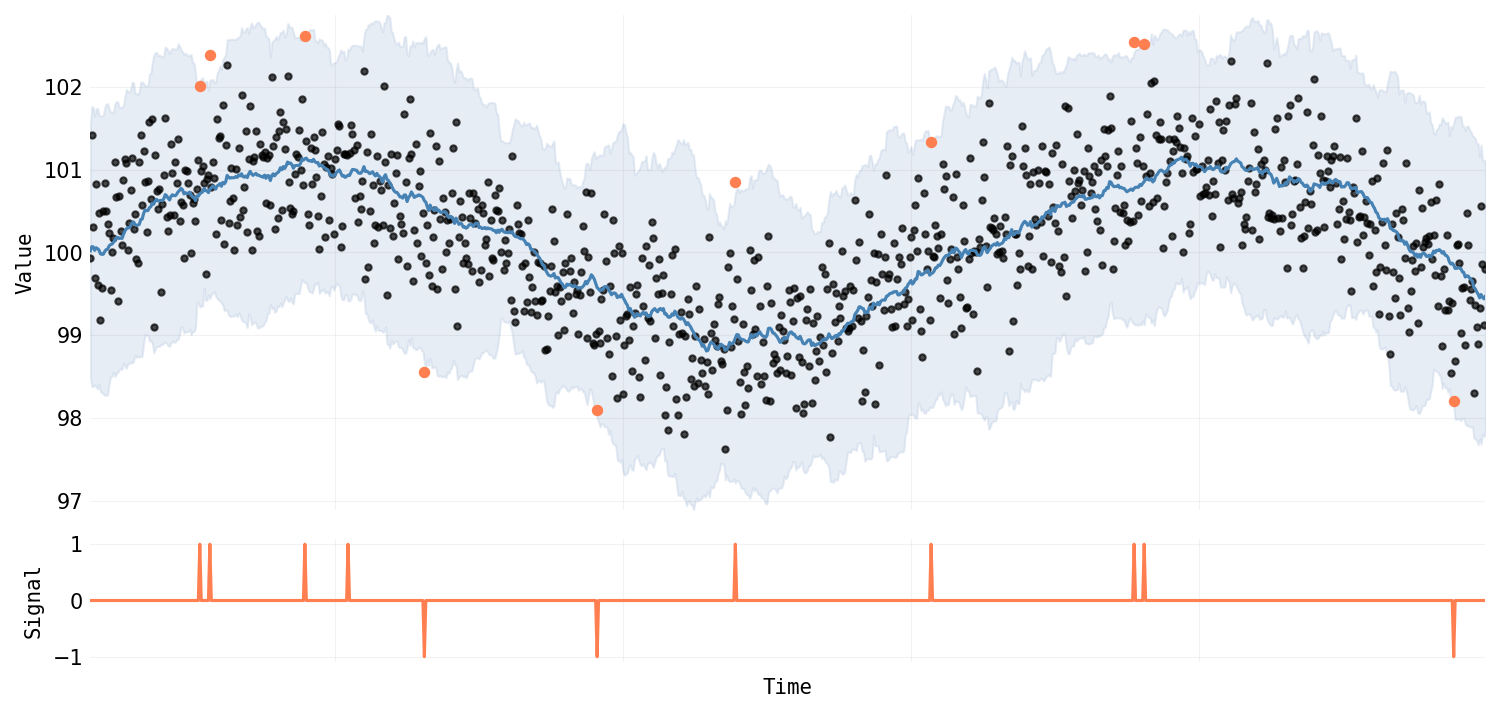

In [230]:
# Plot the results
fig = anomDetector.plot(y, results)

## **Helper for Interactive Plotting**

To understand each parameters' impact, it can be useful to explore with an interactive visualization.

In [232]:
def interactive_thresholding(y, lag=5, threshold=3.5, influence=0.5):
    anomDectector = ThresholdingAnomalyDetector(lag, threshold, influence)
    results = anomDectector.run(y)
    fig = anomDetector.plot(y, results)

# Create sliders for lag, threshold, and influence
lag_slider = widgets.IntSlider(min=1, max=40, step=1, value=30, description='Lag:')
threshold_slider = widgets.FloatSlider(min=0, max=10, step=0.25, value=3, description='Threshold:')
influence_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Influence:')

# Display the interactive plot
widgets.interact(interactive_thresholding, y=widgets.fixed(y), lag=lag_slider, threshold=threshold_slider, influence=influence_slider)

interactive(children=(IntSlider(value=30, description='Lag:', max=40, min=1), FloatSlider(value=3.0, descripti…

<function __main__.interactive_thresholding(y, lag=5, threshold=3.5, influence=0.5)>

## **Real-Time Implementation**

Sometimes we may want to apply this algorithm in real-time. Ie. We do not want to have to compute the historic data each time.

In [225]:
realTimeDetector = RealTimeAnomalyDetector(LAG, THRESHOLD, ANOMALY_INFLUENCE)

y = [1, 2, 3, 2, 1, 2, 1, 2, 1, 80, 1, -20, 1, 2, 1]  # Example time series data with anomalies

# Simulate incoming data stream
for data in y:
    signal = detector.run(data)
    print(f"Data:\t{data}, Signal:\t{signal}")

Data:	1, Signal:	-0.0
Data:	2, Signal:	0.0
Data:	3, Signal:	1.0
Data:	2, Signal:	0.0
Data:	1, Signal:	-1.0
Data:	2, Signal:	0.0
Data:	1, Signal:	-1.0
Data:	2, Signal:	0.0
Data:	1, Signal:	-1.0
Data:	80, Signal:	1.0
Data:	1, Signal:	-0.0
Data:	-20, Signal:	-1.0
Data:	1, Signal:	-0.0
Data:	2, Signal:	0.0
Data:	1, Signal:	0.0
